<a href="https://colab.research.google.com/github/matthewreed2000/cse380-notebooks/blob/master/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

*Matthew Reed*

In collaboration with:
- Davis Kerr
- Brayden Whitlock
- Paul Semadeni

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

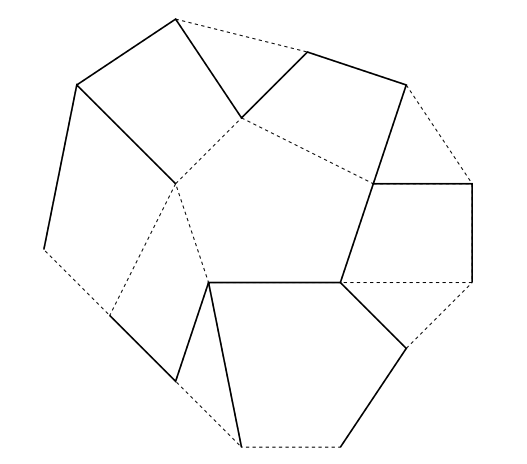

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

### Create Functions

In [87]:
def get_nodes(graph):
  return [*graph]

In [88]:
def get_links(graph):
  filtered_links = set([frozenset([k,v]) for k in get_nodes(graph) for v in graph[k]])
  return {tuple(link) for link in filtered_links}

In [89]:
def adj_list(graph):
  # return [[k,v] for k,v in graph.items()]
  return graph

In [90]:
def get_adj_nodes(graph, node):
  return adj_list(graph)[node]

### Generate Spanning Tree

#### Old Code (Doesn't work)

In [ ]:
# def gen_spanning_tree(graph, root=None):
#   if not root:
#     root = get_nodes(graph)[0]
#   return gen_spanning_tree_rec(graph, [root], root, get_adj_nodes(graph,root), [])

# def gen_spanning_tree_rec(graph, used, root, adj_rem, subtrees):
#   print(root, adj_rem, subtrees)
#   if adj_rem == []:
#     return [root, subtrees]
#   elif adj_rem[0] not in used:
#     new_used = used + [adj_rem[0]]
#     subtree = gen_spanning_tree_rec(graph, new_used, adj_rem[0], get_adj_nodes(graph, adj_rem[0]), [])
#     return gen_spanning_tree_rec(graph, new_used, root, adj_rem[1:], subtrees + [subtree])
#   else:
#     return gen_spanning_tree_rec(graph, used, root, adj_rem[1:], subtrees)

#### Working Code

In [91]:
def gen_spanning_tree(graph, root=None):
  if not root:
    root = get_nodes(graph)[0]
  frontier = [root]
  tree = gen_spanning_tree_rec(graph, frontier, [])
  graph = gen_graph_from_links(tree)
  return graph

# Davis wrote this function initially
# I made it functional
def gen_spanning_tree_rec(graph, frontier, tree):
  if set(frontier) == set(get_nodes(graph)):
    return tree
  possible = list(filter(lambda n: (n[1] not in frontier and n[0] in frontier) or (n[0] not in frontier and n[1] in frontier), get_links(graph)))
  return gen_spanning_tree_rec(graph, frontier + [possible[0][0] if possible[0][0] not in frontier else possible[0][1]], tree + [possible[0]])

def gen_graph_from_links(links):
  nodes = set([x[0] for x in links] + [x[1] for x in links])
  graph = {x:[pair[pair[0] == x] for pair in links if x in pair] for x in nodes}
  return graph

### Preliminary Tests

In [136]:
graph = {'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['b', 'c']}

In [137]:
print(get_nodes(graph))

['a', 'b', 'c', 'd']


In [138]:
print(get_links(graph))

{('c', 'a'), ('c', 'd'), ('b', 'a'), ('d', 'b')}


In [139]:
print(adj_list(graph))

{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['b', 'c']}


In [140]:
print(get_adj_nodes(graph, 'a'))

['b', 'c']


In [163]:
print(gen_spanning_tree(graph))

{'d': ['c'], 'c': ['a', 'd'], 'a': ['c', 'b'], 'b': ['a']}


### Display Graphs

In [12]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [196]:
from graphviz import Graph
from IPython.display import SVG, display

# This function was created by Davis.
# I made some substantial modifications
def display_graph(graph):
  # Sorted for consistent displays
  links = [sorted(x) for x in get_links(graph)]
  nodes = get_nodes(graph)
  dot = Graph(format='svg')

  [*map(lambda n: dot.node(str(n)), nodes)]
  [*map(lambda l: dot.edge(str(l[0]), str(l[1])), links)]

  # print(dot)
  dot.render('test-output/graph')
  display(SVG('test-output/graph.svg'))

def disp_graph_tree(graph):
  print("Original Graph:")
  display_graph(graph)

  print("Spanning Tree of Graph:")
  tree = gen_spanning_tree(graph)
  display_graph(tree)

Original Graph:


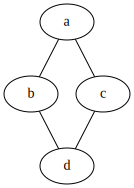

Spanning Tree of Graph:


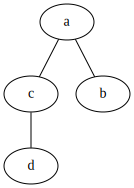

In [197]:
disp_graph_tree(graph)

## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

### Create and Test Ladder Graphs

In [173]:
# Create a ladder graph with n rungs
def create_ladder(n):
  graph_list = []
  for i in range(n):
    connections_l = [2*i + 1]
    connections_r = [2*i]
    if i < n - 1:
      connections_l += [2*i + 2]
      connections_r += [2*i + 3]
    if i > 0:
      connections_l += [2*i - 2]
      connections_r += [2*i - 1]
    graph_list += [(2*i, connections_l), (2*i + 1, connections_r)]
  return {i:l for i,l in graph_list}

Original Graph:


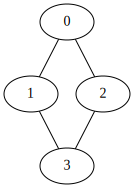

Spanning Tree of Graph:


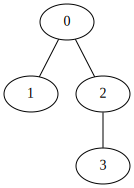

In [175]:
disp_graph_tree(create_ladder(2))

Original Graph:


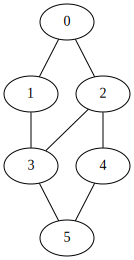

Spanning Tree of Graph:


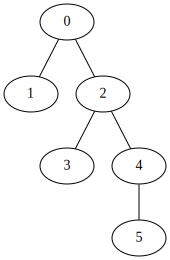

In [176]:
disp_graph_tree(create_ladder(3))

Original Graph:


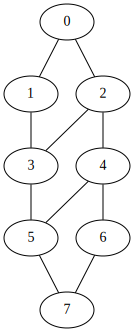

Spanning Tree of Graph:


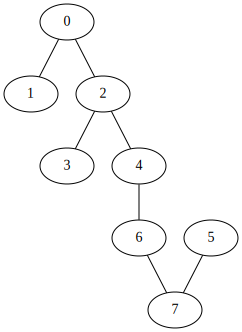

In [177]:
disp_graph_tree(create_ladder(4))

Original Graph:


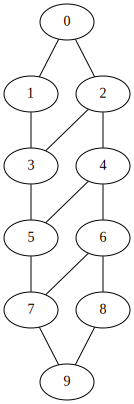

Spanning Tree of Graph:


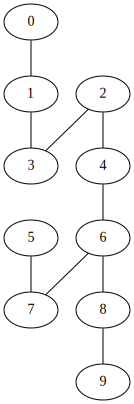

In [178]:
disp_graph_tree(create_ladder(5))

### Testing the Example Graph

In [181]:
example_graph = {
    'a': ['c', 'd', 'b'],
    'b': ['a', 'g', 'f'],
    'c': ['e', 'd', 'a'],
    'd': ['h', 'g', 'a', 'c'],
    'e': ['i', 'h', 'c'],
    'f': ['b', 'l'],
    'g': ['d', 'j', 'l', 'b'],
    'h': ['k', 'd', 'e', 'i'],
    'i': ['m', 'h', 'e'],
    'j': ['g', 'k', 'o', 'n'],
    'k': ['j', 'h', 'm', 'p'],
    'l': ['f', 'g', 'n'],
    'm': ['p', 'k', 'i'],
    'n': ['l', 'j', 'o'],
    'o': ['n', 'j', 'q'],
    'p': ['q', 'k', 'm'],
    'q': ['o', 'p']
}

Original Graph:


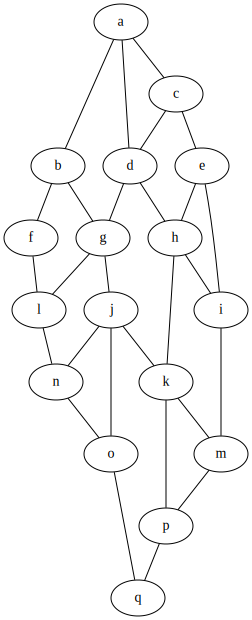

Spanning Tree of Graph:


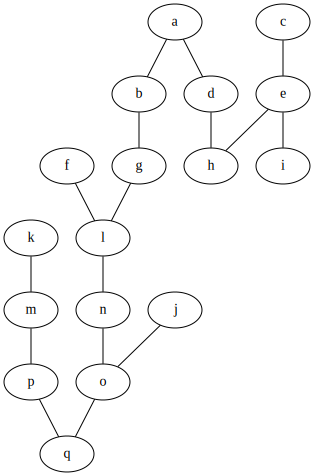

In [182]:
disp_graph_tree(example_graph)

### Generate and Test Larger Graphs

In [185]:
import random

def gen_rand_tree(n, p):
  sapling = {i:random.sample([x for x in range(n) if x != i], int(p * (n - 1))) for i in range(n)}
  tree = gen_graph_from_links(get_links(sapling))
  return tree

In [188]:
medium_tree = gen_rand_tree(21, 0.7)
large_tree = gen_rand_tree(50, 0.5)
large_tree_full = gen_rand_tree(50, 1)

In [189]:
print(f'medium_tree has {len(get_nodes(medium_tree))} nodes and {len(get_links(medium_tree))} links.')
print(f'large_tree has {len(get_nodes(large_tree))} nodes and {len(get_links(large_tree))} links.')
print(f'large_tree_full has {len(get_nodes(large_tree_full))} nodes and {len(get_links(large_tree_full))} links.')

medium_tree has 21 nodes and 191 links.
large_tree has 50 nodes and 909 links.
large_tree_full has 50 nodes and 1225 links.


Original Graph:


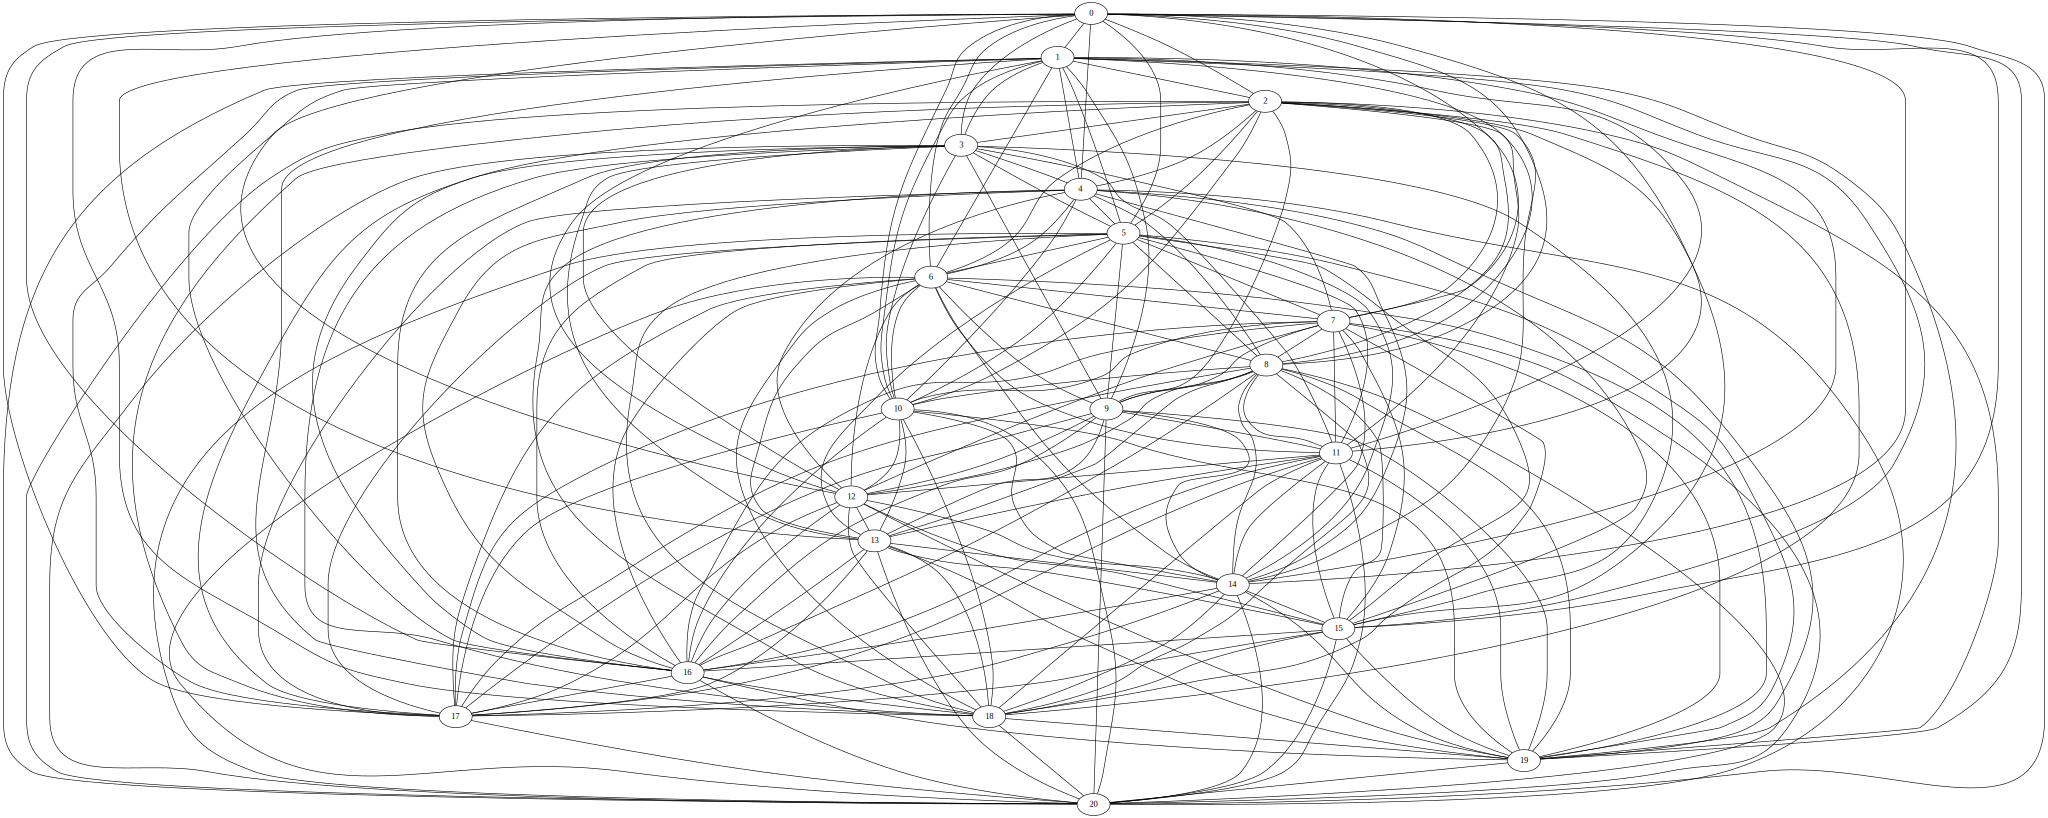

Spanning Tree of Graph:


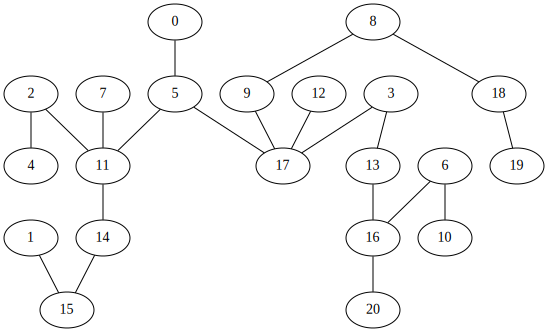

In [187]:
disp_graph_tree(medium_tree)

Original Graph:


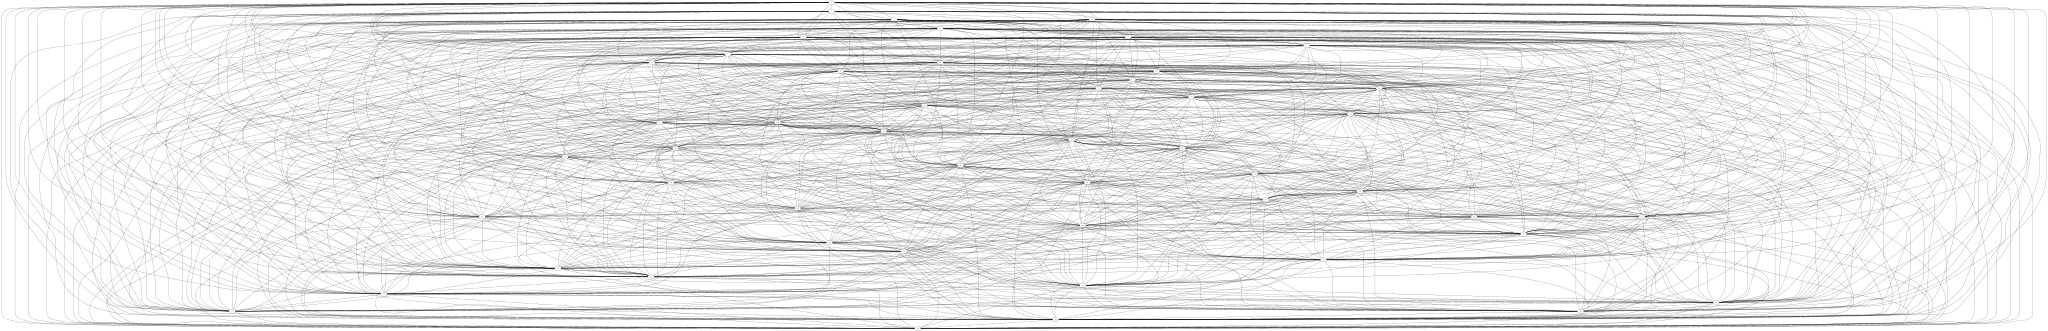

Spanning Tree of Graph:


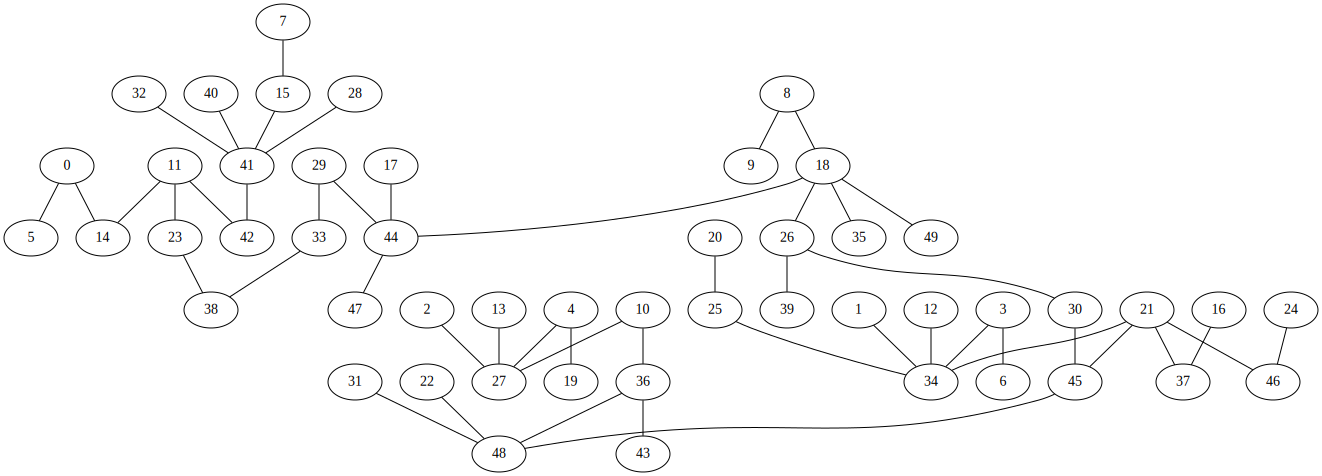

In [198]:
disp_graph_tree(large_tree)

Original Graph:


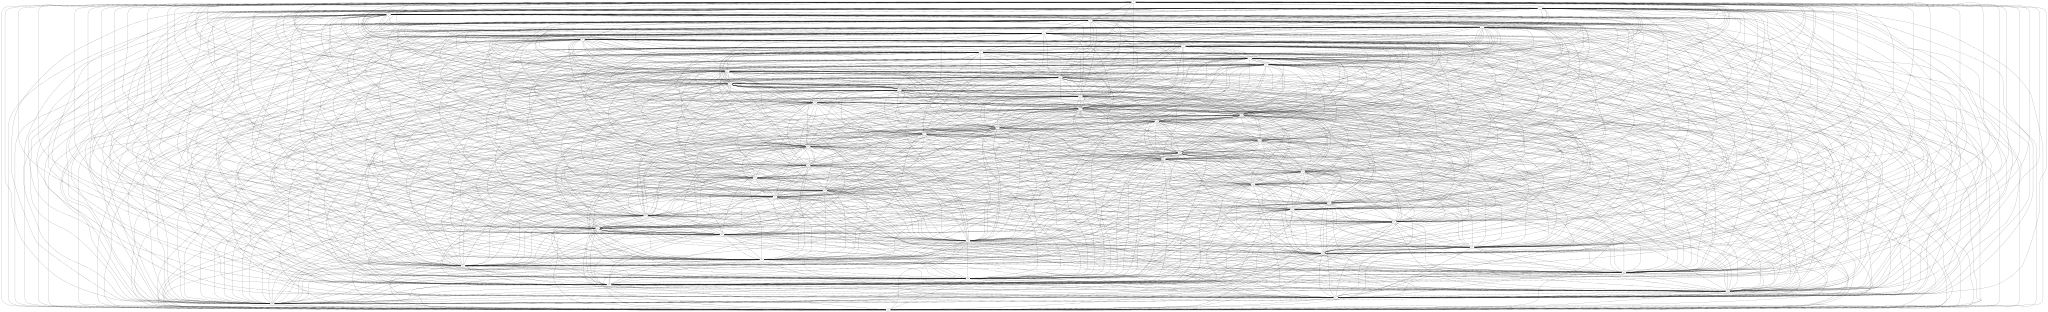

Spanning Tree of Graph:


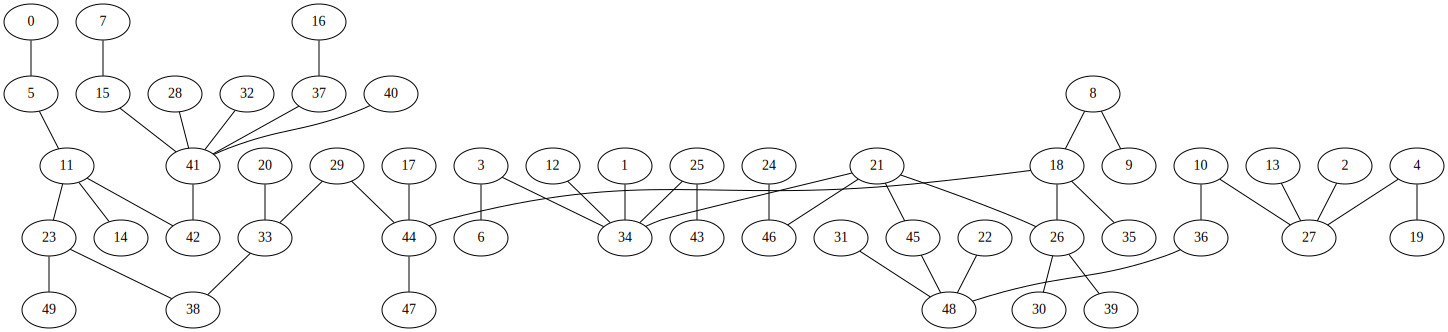

In [199]:
disp_graph_tree(large_tree_full)

# My Report on What I Did and What I Learned

## Fun


Solving the problem of finding spanning trees was rewarding on its own. Beyond that, it was interesting to see complex graphs simplified down into a relatively small spanning tree once we had completed the problem-solving portion.

## New

This week, I learned about spanning trees. The concept seemed familiar, but I don't think I had ever gone in-depth into learning about them. I also learned how to use a library for displaying graphs in Python. Beyond that, I also learned about another one of Python's quirks. When a function has a default value containing a list, the list is not re-initialized each time the function runs. So if the function uses something like append(), the list is never cleared.

## Meaningful


I was able to get more practice using functional programming. I was also able to work with my group to solve the problem of generating spanning trees. I don't necessarily find this specific problem meaningful; I'm more impressed that we could combine our efforts to solve something we hadn't encountered before.

## Other

### Connections and Collaborator Contributions

The assignment this week reminded me of how routing works in software such as Google Maps. Although they don't use spanning trees (as far as I know), there are methods in place to make sure that loops don't occur within the chosen path. Just as there are multiple spanning trees for the same graph, Google Maps also displays and compares multiple routes between locations.

### Collaborator Contributions

Davis was the one who initially implemented displaying the graphs. He was also the one who thought to implement an XOR algorithm to make sure that there were no loops within the spanning trees. Paul and Brayden were both helpful in catching mistakes, helping debug, and asking clarifying questions.

### Above and Beyond



Our group wrote our code using functional programming as often as we were able. We also used graphics libraries to display the graphs and spanning trees within the notebook. In addition to this, I wrote code to generate ladder graphs and larger random graphs rather than creating each type of tree by hand.

# What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [203]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}